## 6.01 - Supervised Learning Model Comparison

Recall the "data science process."

1. Define the problem.
2. Gather the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus mostly on creating (and then comparing) many regression and classification models. Thus, we'll define the problem and gather the data for you.
Most of the questions requiring a written response can be written in 2-3 sentences.

### Step 1: Define the problem.

You are a data scientist with a financial services company. Specifically, you want to leverage data in order to identify potential customers.

If you are unfamiliar with "401(k)s" or "IRAs," these are two types of retirement accounts. Very broadly speaking:
- You can put money for retirement into both of these accounts.
- The money in these accounts gets invested and hopefully has a lot more money in it when you retire.
- These are a little different from regular bank accounts in that there are certain tax benefits to these accounts. Also, employers frequently match money that you put into a 401k.
- If you want to learn more about them, check out [this site](https://www.nerdwallet.com/article/ira-vs-401k-retirement-accounts).

We will tackle one regression problem and one classification problem today.
- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

Check out the data dictionary [here](http://fmwww.bc.edu/ec-p/data/wooldridge2k/401KSUBS.DES).

### NOTE: When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable. When predicting `e401k`, you may use the entire dataframe if you wish.

### Step 2: Gather the data.

##### 1. Read in the data from the repository.

In [2]:
import pandas as pd
df = pd.read_csv('./401ksubs.csv')
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


##### 2. What are 2-3 other variables that, if available, would be helpful to have?

In [3]:
# Years worked full time, Education, info on other investments.

##### 3. Suppose a peer recommended putting `race` into your model in order to better predict who to target when advertising IRAs and 401(k)s. Why would this be an unethical decision?

In [4]:
# If we're attempting to target someone for a service, 
# especially one that could benefit an inidivual, using race
# to measure who should or should not qualify for such benefits
# would potentially exclude people from the benfits on the basis
# of race, which is highly unethical.

## Step 3: Explore the data.

##### 4. When attempting to predict income, which feature(s) would we reasonably not use? Why?

In [5]:
# Income and income squared, likely, as they could both perfectly predict income,
# because they are income. 

In [6]:
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


In [7]:
df.describe()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
count,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000
mean,0.392129,39.254641,0.628571,0.204420,41.080216,2.885067,19.071675,0.276226,0.254340,2121.192483,1793.652722
std,0.488252,24.090002,0.483213,0.403299,10.299517,1.525835,63.963838,0.447154,0.435513,3001.469424,895.648841
min,0.000000,10.008000,0.000000,0.000000,25.000000,1.000000,-502.302000,0.000000,0.000000,100.160100,625.000000
25%,0.000000,21.660000,0.000000,0.000000,33.000000,2.000000,-0.500000,0.000000,0.000000,469.155600,1089.000000
50%,0.000000,33.288000,1.000000,0.000000,40.000000,3.000000,2.000000,0.000000,0.000000,1108.091000,1600.000000
75%,1.000000,50.160000,1.000000,0.000000,48.000000,4.000000,18.449500,1.000000,1.000000,2516.025500,2304.000000
max,1.000000,199.041000,1.000000,1.000000,64.000000,13.000000,1536.798000,1.000000,1.000000,39617.320000,4096.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9275 entries, 0 to 9274
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   e401k   9275 non-null   int64  
 1   inc     9275 non-null   float64
 2   marr    9275 non-null   int64  
 3   male    9275 non-null   int64  
 4   age     9275 non-null   int64  
 5   fsize   9275 non-null   int64  
 6   nettfa  9275 non-null   float64
 7   p401k   9275 non-null   int64  
 8   pira    9275 non-null   int64  
 9   incsq   9275 non-null   float64
 10  agesq   9275 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 797.2 KB


In [9]:
df.isnull().sum()

e401k     0
inc       0
marr      0
male      0
age       0
fsize     0
nettfa    0
p401k     0
pira      0
incsq     0
agesq     0
dtype: int64

##### 5. What two variables have already been created for us through feature engineering? Come up with a hypothesis as to why subject-matter experts may have done this.
> This need not be a "statistical hypothesis." Just brainstorm why SMEs might have done this!

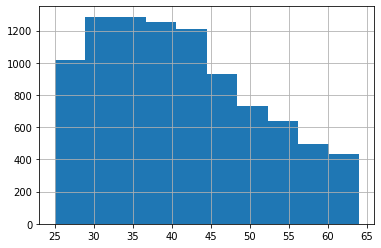

In [10]:
# Income quared and age squared. Perhaps this was done to assure a more normal 
# distribtion of the variables, or perhaps some expert was aware of a relationship
# between incsq and other variables that did not present itself in inc alone.

df['age'].hist()

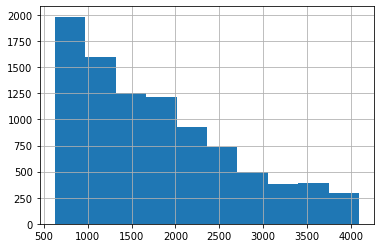

In [11]:
df['agesq'].hist()

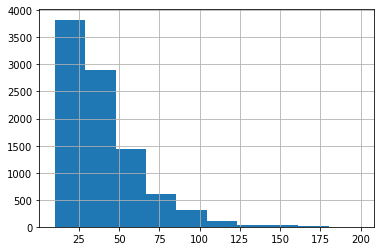

In [12]:
df['inc'].hist()

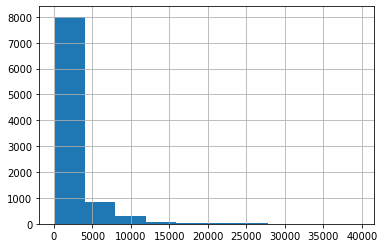

In [13]:
df['incsq'].hist()

##### 6. Looking at the data dictionary, one variable description appears to be an error. What is this error, and what do you think the correct value would be?

In [14]:
# Both income and age are described as as the squares of their values. 
# The correct description for these should be age in years and income in thousands of dollars.

## Step 4: Model the data. (Part 1: Regression Problem)

Recall:
- Problem: What features best predict one's income?
- When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable.

##### 7. List all modeling tactics we've learned that could be used to solve a regression problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific regression problem and explain why or why not.

In [15]:
# multiple linear regression --yes, can interpret feature impact
# knn --no, cannot interpret feature impact
# decision tree --yes, can interpret feature impact
# extra trees --yes, can interpret feature impact
# bagging with decision trees --yes, can interpret feature impact
# Adaboost model --yes, can interpret feature impact
# XGBoost model --yes, can interpret feature impact
# SVM regression --yes, can interpret feature impact

##### 8. Regardless of your answer to number 7, fit at least one of each of the following models to attempt to solve the regression problem above:
    - a multiple linear regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector regressor
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend setting a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [63]:
# Import Libraries:

import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score


In [17]:
# Define X and y:

X = df.drop(columns=["e401k", "p401k", "inc", "incsq", "pira"])
y = df["inc"]

In [18]:
# Train/test Split:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
# Fit MLR:

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Fit KNN:

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [21]:
# Fit CART:

cart = DecisionTreeRegressor()
cart.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [22]:
# Fit bagging:

bag = BaggingRegressor()
bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [23]:
# Fit Random Forest:

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [24]:
# Fit Adaboost:

adb = AdaBoostRegressor()
adb.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [25]:
# Fit SVM:

svm = SVR()
svm.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

##### 9. What is bootstrapping?

In [26]:
# Random resampling with replacement.

##### 10. What is the difference between a decision tree and a set of bagged decision trees? Be specific and precise!

In [27]:
# A decision tree takes the best split in a feature.
# Bagged decision rees use bootstrap aggregation. Multiple trees are averaged.

##### 11. What is the difference between a set of bagged decision trees and a random forest? Be specific and precise!

In [28]:
# Random forests ==> only a subset of features are selected at random and the best split feature from the
# subset is used to split each node in a tree. 
# Bagging ==> all features are considered for splitting a node.

##### 12. Why might a random forest be superior to a set of bagged decision trees?
> Hint: Consider the bias-variance tradeoff.

In [29]:
# Becasue feature selection of random forests is random, individual trees tend to 
# be less correlated, resuklting in less variance.

## Step 5: Evaluate the model. (Part 1: Regression Problem)

##### 13. Using RMSE, evaluate each of the models you fit on both the training and testing data.

In [30]:
# Import Libraries: 

from sklearn.metrics import mean_squared_error

In [31]:
# Write function to return RMSE of scored models:

def rmse_score(model, X_train, X_test, y_train, y_test):
    mse_train = mean_squared_error(y_true = y_train, y_pred = model.predict(X_train))
    mse_test = mean_squared_error(y_true = y_test, y_pred = model.predict(X_test))
    rmse_train = mse_train ** 0.5
    rmse_test = mse_test ** 0.5
    
    print(f'Train RMSE: {rmse_train}')
    print(f'Test RMSE: {rmse_test}')
    return (rmse_train, rmse_test)

# Code adapted from GA DSI Lab 6.01 Solution

##### 14. Based on training RMSE and testing RMSE, is there evidence of overfitting in any of your models? Which ones?

In [32]:

rmse_score(lr, X_train, X_test, y_train, y_test)

Train RMSE: 20.086432991271494
Test RMSE: 20.981222872070013


(20.086432991271494, 20.981222872070013)

In [33]:
rmse_score(knn, X_train, X_test, y_train, y_test)

Train RMSE: 17.09983276782106
Test RMSE: 21.475481552594076


(17.09983276782106, 21.475481552594076)

In [34]:
rmse_score(cart, X_train, X_test, y_train, y_test)

Train RMSE: 2.2981381078557472
Test RMSE: 27.188829300457005


(2.2981381078557472, 27.188829300457005)

In [35]:
rmse_score(bag, X_train, X_test, y_train, y_test)

Train RMSE: 8.880190953763814
Test RMSE: 21.033321317012692


(8.880190953763814, 21.033321317012692)

In [36]:
rmse_score(rf, X_train, X_test, y_train, y_test)

Train RMSE: 7.715743943178125
Test RMSE: 20.45269872890559


(7.715743943178125, 20.45269872890559)

In [37]:
rmse_score(adb, X_train, X_test, y_train, y_test)

Train RMSE: 23.31667980699543
Test RMSE: 24.236096659891555


(23.31667980699543, 24.236096659891555)

In [38]:
rmse_score(svm, X_train, X_test, y_train, y_test)

Train RMSE: 23.48620507770086
Test RMSE: 24.055846528936915


(23.48620507770086, 24.055846528936915)

In [39]:
# They're all overfit. Training RMSE is consistently lower. 

##### 15. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

In [40]:
# Probably linear regression, as it has a relatively smaller gap between training and testing RMSE, and is easily interpretable.

##### 16. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

In [41]:
# We could search for more data, consider variable transformations, or use GridSearch to optimize hyperparameters. 

## Step 6: Model the data. (Part 2: Classification Problem)

Recall:
- Problem: Predict whether or not one is eligible for a 401k.
- When predicting `e401k`, you may use the entire dataframe if you wish.

##### 17. While you're allowed to use every variable in your dataframe, mention at least one disadvantage of using `p401k` in your model.

In [1]:
# If we're attemptiong to predict whether someone has a 401k, it doesn't make sense to include a 
# variable describing the very thing we're trying to predict--it wouild 
# confound our results and obscure the meaning/impact of other variables.

##### 18. List all modeling tactics we've learned that could be used to solve a classification problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific classification problem and explain why or why not.

In [44]:
# Logistic regression, K-nearest neighbors, Naive Bayes, 
# Decision trees, Baggiong, Random forest, Extra trees, Adaboost, XGBoost, and SVMs

##### 19. Regardless of your answer to number 18, fit at least one of each of the following models to attempt to solve the classification problem above:
    - a logistic regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector classifier
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend using a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [42]:
# Define X and y:

X = df.drop(columns=['e401k', 'p401k'])
y = df['e401k']

In [43]:
# Train/Test Split:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [44]:
# Scale data:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
# Logistic Regression:

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
# KNN:

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [52]:
# Cart:

cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
# Bagging:

bag = BaggingClassifier()
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [54]:
# Random Forest:

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
# Adaboost:

adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [56]:
# Support Vector:

svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Step 7: Evaluate the model. (Part 2: Classfication Problem)

##### 20. Suppose our "positive" class is that someone is eligible for a 401(k). What are our false positives? What are our false negatives?

In [ ]:
# FP = indidviduals incorrectly predicted as eligible, 
# FN = indidviduals incorrectly predicted to be inelgible

##### 21. In this specific case, would we rather minimize false positives or minimize false negatives? Defend your choice.

In [57]:
# I imagine a business would want to minimize false positives for purposes of 
# saving money, but from a social perspective, I would rather more people have access
# to 401(k)s, and would thus choose to minimize false negatives.

##### 22. Suppose we wanted to optimize for the answer you provided in problem 21. Which metric would we optimize in this case?

In [58]:
# Sensativity

##### 23. Suppose that instead of optimizing for the metric in problem 21, we wanted to balance our false positives and false negatives using `f1-score`. Why might [f1-score](https://en.wikipedia.org/wiki/F1_score) be an appropriate metric to use here?

In [59]:
# The f-1 score is intended to balance FPs and FNs.

##### 24. Using f1-score, evaluate each of the models you fit on both the training and testing data.

In [65]:
# Function to score models:

def f1(model, X_train, X_test, y_train, y_test):
    f1_train = f1_score(y_true = y_train, y_pred = model.predict(X_train))
    f1_test = f1_score(y_true = y_test, y_pred = model.predict(X_test))
    
    print('F1 train: '  + str(model.__class__.__name__) + ' : ' + str(f1_train))
    print('F1 test: ' + str(model.__class__.__name__) + ' : ' + str(f1_test))
    
# Code adapted from 6.01 Solutions

In [66]:
# Score using funciton: 

f1(lr, X_train, X_test, y_train, y_test)
f1(knn, X_train, X_test, y_train, y_test)
f1(cart, X_train, X_test, y_train, y_test)
f1(bag, X_train, X_test, y_train, y_test)
f1(rf, X_train, X_test, y_train, y_test)
f1(adaboost, X_train, X_test, y_train, y_test)
f1(svc, X_train, X_test, y_train, y_test)

F1 train: LogisticRegression : 0.4822048611111111
F1 test: LogisticRegression : 0.4708994708994709
F1 train: KNeighborsClassifier : 0.6587677725118484
F1 test: KNeighborsClassifier : 0.49910017996400713
F1 train: DecisionTreeClassifier : 1.0
F1 test: DecisionTreeClassifier : 0.48226950354609927
F1 train: BaggingClassifier : 0.9735074626865671
F1 test: BaggingClassifier : 0.46805819101834284
F1 train: RandomForestClassifier : 0.9998174849425077
F1 test: RandomForestClassifier : 0.5274861025324274
F1 train: AdaBoostClassifier : 0.569066344020972
F1 test: AdaBoostClassifier : 0.5552165954850519
F1 train: SVC : 0.4805102763997165
F1 test: SVC : 0.46031746031746035


##### 25. Based on training f1-score and testing f1-score, is there evidence of overfitting in any of your models? Which ones?

In [67]:
# THe highest delta between train and test F1 scores occur with the 
# Decision Tree Classifier, Bagging Classifier, and Random Forest Classifier. 
# To a lesser extent, the KNN is also overfit.

##### 26. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

In [69]:
# I would probably go with Adaboost or the Logistic Regression.
# AdaBoost appears to be the least overfit with the highest F1 score,
# And logistic regression has more interpretable results.

##### 27. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

In [70]:
# Similar to the above regression problems, I might explore more feature engineering around
# squared terms, as was done with some of the variables provided, as well as 
# GridSearch to optimize hyperparameters.

## Step 8: Answer the problem.

##### BONUS: Briefly summarize your answers to the regression and classification problems. Be sure to include any limitations or hesitations in your answer.

- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.